# Assignment 1

- Set Jupyter server in your home account so that you can use it remotely (Optional due to Covid-19!)
- Build 2 layer network for Logistic Regression Classifier using pure python/numpy 
    - Input data x : 20 x 784 (20 is the batch size)
    - label y : 20 x 10
    - Weight Variable W with random_normal initialization
    - Bias variable b with zeros
    - Use softmax activation => softmax(x.W+b)
    - Use OneHot encoding and MSE loss! Not the best way for classification but just for practice 
    - Train the model on MNIST
    - PS: If you dont know how to start see this: http://iamtrask.github.io/2015/07/12/basic-python-network/
- Submit your ipython notebook file to farazi@ais.uni-bonn.de with subject: Assignment1

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset= dsets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset= dsets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!






/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
import numpy as np

In [0]:
# test dataset
X_test = test_dataset.data.numpy()
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
X_test = np.array(X_test, dtype=np.float32)/255.

# output data (labels)
y_test = test_dataset.targets.numpy()
y_vector_test = np.eye(10)[y_test]

In [0]:
# train dataset

# input dataset
X = train_dataset.data.numpy()
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])
X = np.array(X, dtype=np.float32)/255.

# output data (labels)
y = train_dataset.targets.numpy()
y_vector = np.eye(10)[y]

Label: 5


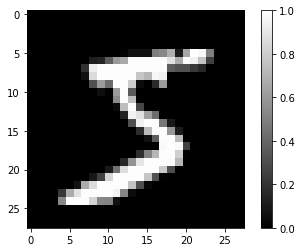

In [5]:
# example

import matplotlib.pyplot as plt
img = X[0].reshape(28,28)
plt.imshow(img,cmap='gray')
plt.colorbar()

print("Label: " + str(y[0]))

In [0]:
# softmax function
def softmax(z,deriv=False):
    z = z.reshape(-1,1)
    if(deriv==True):
        z = z.reshape(-1,1)
        return np.diagflat(z) - np.dot(z, z.T)
    z -= np.max(z)
    return (np.exp(z).T / np.sum(np.exp(z), axis=0)).T

In [0]:
def softmax_batch(z,deriv=False):
    if(deriv==True):
        derivative = np.zeros((z.shape[1],z.shape[1]))
        for row in range(z.shape[0]):
            derivative += softmax(z[row][:], deriv)
        derivative /= z.shape[0]
        return derivative
        
    batch_z = np.zeros(z.shape)
    for row in range(z.shape[0]):
        batch_z[row][:] = softmax(z[row][:]).T
    
    return batch_z

In [8]:
num_labels = 10

# default accuracy 0 %
accuracy = 0

# seed random numbers to make calculation
np.random.seed(1)

# initialize weights with random normal initialization
weights = np.random.random((X.shape[1], num_labels))

# initialize bias with zeros
bias = np.zeros(num_labels)

# the optimal values
opt_weights = weights
opt_bias = bias


batch_size = 20
num_batches = int(X.shape[0] / batch_size) # 3000

for epoche in range(50):
    #print("Epoche: " + str(epoche))
    #permutation = np.random.permutation(X.shape[0])
    #np.take(X,permutation,axis=0,out=X);
    #np.take(y_vector,permutation,axis=0,out=y_vector);
    
    for batch in range(num_batches):
        #print(str(epoche) + " Batch: " + str(batch))
        
        # input
        X_batch = X[batch_size*batch:(batch_size*batch+batch_size),:]
        
        # labels
        y_batch = y_vector[batch_size*batch:(batch_size*batch+batch_size)]
        
        # forward propagation
        l0 = X_batch
        l1 = softmax_batch(np.dot(l0,weights) + bias)
        
        # Mean Square Error
        mse = ((y_batch-l1)**2).mean()
        # print("Epoche: " + str(epoche)+ "; Batch: " + str(batch) +"; MSE = " + str(mse)) # <--------- MSE for every batch
        
        # The Error Weighted Derivative
        # using chain rule
        derivative_w = np.dot(l0.T, np.dot(2*(y_batch-l1),softmax_batch(l1, True)))
        # derivative_b = np.dot(np.ones(num_labels), np.dot(2*(y_batch-l1),softmax_batch(l1, True)))
        
        # update weights (We add here because we did not use minus sign in the above calculation of derivative_w)
        # mse as learning rate
        weights += mse * derivative_w
        # bias += mse * derivative_b
    
    # accuracy with test data
    # if accuracy is better save weights and bias
    correct = 0
    result_test = np.argmax(softmax_batch(np.dot(X_test,weights) + bias), axis=1)

    # similarity is 0 if classification is correct
    # correct the number of 0s in similarity
    similarity = y_test - result_test
    correct = np.count_nonzero(similarity==0)

    # if better accuracy -> refresh
    if accuracy < (correct/len(similarity)):
        accuracy = correct/len(similarity)
        # save new optimal weights
        opt_weights = weights
        opt_bias = bias
        print("Epoche " + str(epoche) +"; accuracy: " + str(accuracy) + " (NEW)")
    else:
        print("Epoche " + str(epoche) +"; accuracy: " + str(accuracy) )
        

Epoche 0; accuracy: 0.7974 (NEW)
Epoche 1; accuracy: 0.8052 (NEW)
Epoche 2; accuracy: 0.8082 (NEW)
Epoche 3; accuracy: 0.8101 (NEW)
Epoche 4; accuracy: 0.8115 (NEW)
Epoche 5; accuracy: 0.8121 (NEW)
Epoche 6; accuracy: 0.8123 (NEW)
Epoche 7; accuracy: 0.8129 (NEW)
Epoche 8; accuracy: 0.8135 (NEW)
Epoche 9; accuracy: 0.8135
Epoche 10; accuracy: 0.9087 (NEW)
Epoche 11; accuracy: 0.9137 (NEW)
Epoche 12; accuracy: 0.9154 (NEW)
Epoche 13; accuracy: 0.9171 (NEW)
Epoche 14; accuracy: 0.9177 (NEW)
Epoche 15; accuracy: 0.9186 (NEW)
Epoche 16; accuracy: 0.9188 (NEW)
Epoche 17; accuracy: 0.9188
Epoche 18; accuracy: 0.9191 (NEW)
Epoche 19; accuracy: 0.9194 (NEW)
Epoche 20; accuracy: 0.9194
Epoche 21; accuracy: 0.9201 (NEW)
Epoche 22; accuracy: 0.9203 (NEW)
Epoche 23; accuracy: 0.9208 (NEW)
Epoche 24; accuracy: 0.9209 (NEW)
Epoche 25; accuracy: 0.9209
Epoche 26; accuracy: 0.9211 (NEW)
Epoche 27; accuracy: 0.9213 (NEW)
Epoche 28; accuracy: 0.9213
Epoche 29; accuracy: 0.9214 (NEW)
Epoche 30; accuracy: